In [1]:
from DataNamesReference import *
from UtilityFuncs import getNonEmptyLines
from UtilityFuncs import evaluateModel
import pandas as pd
import numpy as np
import sklearn as skl
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.naive_bayes as sklNaiveBayes
import sklearn.metrics as metrics

import matplotlib.pyplot as plt


In [2]:
SOURCE_DATASET_PATH= datasetDirPath


In [3]:
employmentTypeOptionsFilePath = os.path.join(SOURCE_DATASET_PATH, EMPLOYMENT_TYPE_OPTIONS_FILE_NAME)
requiredExperienceOptionsFilePath = os.path.join(SOURCE_DATASET_PATH, REQUIRED_EXPERIENCE_OPTIONS_FILE_NAME)
requiredEducationOptionsFilePath = os.path.join(SOURCE_DATASET_PATH, REQUIRED_EDUCATION_OPTIONS_FILE_NAME)
industryOptionsFilePath = os.path.join(SOURCE_DATASET_PATH, INDUSTRY_OPTIONS_FILE_NAME)
functionOptionsFilePath = os.path.join(SOURCE_DATASET_PATH, FUNCTION_OPTIONS_FILE_NAME)


with open(employmentTypeOptionsFilePath) as employmentTypeOptionsFile:
    employmentTypeOptions = employmentTypeOptionsFile.read().splitlines()

with open(requiredExperienceOptionsFilePath) as requiredExperienceOptionsFile:
    requiredExperienceOptions = requiredExperienceOptionsFile.read().splitlines()

with open(requiredEducationOptionsFilePath) as requiredEducationOptionsFile:
    requiredEducationOptions = requiredEducationOptionsFile.read().splitlines()

with open(industryOptionsFilePath) as industryOptionsFile:
    industryOptions = industryOptionsFile.read().splitlines()

with open(functionOptionsFilePath) as functionOptionsFile:
    functionOptions = functionOptionsFile.read().splitlines()

In [4]:
def convertDfToStrings(dataDf):
    caseStrings = []

    for caseIndex, caseRow in dataDf.iterrows():
        currCaseString = ""
        if caseRow[TELECOMMUTING_LABEL]:
            currCaseString += "telecommmute "
        if caseRow[HAS_LOGO_LABEL]:
            currCaseString += "has_logo "
        if caseRow[HAS_QUESTIONS_LABEL]:
            currCaseString += "has_questions "

        employmentTypeInd = caseRow[EMPLOYMENT_TYPE_LABEL]
        currCaseString += employmentTypeOptions[employmentTypeInd] + " "

        requiredExperienceInd = caseRow[REQUIRED_EXPERIENCE_LABEL]
        currCaseString += requiredExperienceOptions[requiredExperienceInd] + " "

        requiredEducationInd = caseRow[REQUIRED_EDUCATION_LABEL]
        currCaseString += requiredEducationOptions[requiredEducationInd] + " "

        industryInd = caseRow[INDUSTRY_LABEL]
        currCaseString += industryOptions[industryInd] + " "

        functionInd = caseRow[FUNCTION_LABEL]
        currCaseString += functionOptions[functionInd] + " "

        currCaseString += caseRow[TITLE_LABEL] + " "
        currCaseString += caseRow[LOCATION_LABEL] + " "
        currCaseString += caseRow[DEPARTMENT_LABEL] + " "
        currCaseString += caseRow[COMPANY_PROFILE_LABEL] + " "
        currCaseString += caseRow[DESCRIPTION_LABEL] + " "
        currCaseString += caseRow[REQUIREMENTS_LABEL] + " "
        currCaseString += caseRow[BENEFITS_LABEL] + " "
        
        caseStrings.append(currCaseString)
    
    return caseStrings

In [5]:
trainDataDf = pd.read_csv(trainDataPath, **CSV_READ_ARGS)
trainDataStrings = convertDfToStrings(trainDataDf)
trainLabels = trainDataDf[FRAUDULENT_LABEL].to_numpy()

In [6]:
dataVectorizer = TfidfVectorizer()
trainDataMatrix = dataVectorizer.fit_transform(trainDataStrings)

In [7]:
naiveBayesPredictor = sklNaiveBayes.ComplementNB()
naiveBayesPredictor.fit(trainDataMatrix, trainLabels)


ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [8]:
validDataDf = pd.read_csv(validationDataPath, **CSV_READ_ARGS)
validDataStrings = convertDfToStrings(validDataDf)

In [9]:
validDataMatrix = dataVectorizer.transform(validDataStrings)
validPreds = naiveBayesPredictor.predict_proba(validDataMatrix)
validPreds = [probabilityPreds[1] for probabilityPreds in validPreds]

on  validation  data, the  naive bayes baseline predictor  achieved:
 accuracy=  0.9519015659955258 ; balanced accuracy =  0.5038461538461538 
F1 score=  0.015267175572519085 ; AUROC score=  0.8675608873884736 
Precision=  1.0 ; Recall=  0.007692307692307693
Summary of thresholds (of model output) for ROC curve
 (0th, 10th, 20th...80th, 90th, 100th percentiles):
 [4.47900961e-13 1.53573915e-09 5.70305561e-09 1.89709110e-08
 6.32686222e-08 2.14758444e-07 6.66949125e-07 2.44429604e-06
 1.13225455e-05 9.25950487e-05 1.96347132e+00]


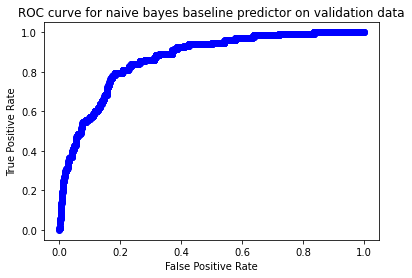

In [10]:
validLabels = validDataDf[FRAUDULENT_LABEL].to_numpy().astype("float64")

evaluateModel("naive bayes baseline predictor", "validation", validLabels, validPreds)

In [11]:
#todo run against test set

testDataDf = pd.read_csv(testDataPath, **CSV_READ_ARGS)
testDataStrings = convertDfToStrings(testDataDf)

In [12]:
testDataMatrix = dataVectorizer.transform(testDataStrings)
testPreds = naiveBayesPredictor.predict_proba(testDataMatrix)
testPreds = [probabilityPreds[1] for probabilityPreds in testPreds]

on  test  data, the  naive bayes baseline predictor  achieved:
 accuracy=  0.9511740588893031 ; balanced accuracy =  0.49980415197806505 
F1 score=  0.0 ; AUROC score=  0.8543252282382717 
Precision=  0.0 ; Recall=  0.0
Summary of thresholds (of model output) for ROC curve
 (0th, 10th, 20th...80th, 90th, 100th percentiles):
 [3.42491749e-12 1.36253778e-09 5.95723783e-09 1.98047828e-08
 7.61189590e-08 2.54045518e-07 7.91237346e-07 2.53710480e-06
 1.09542463e-05 1.03022828e-04 1.86595742e+00]


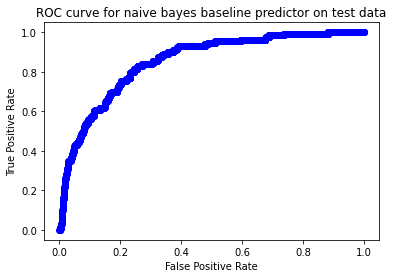

In [13]:
testLabels = testDataDf[FRAUDULENT_LABEL].to_numpy().astype("float64")

evaluateModel("naive bayes baseline predictor", "test", testLabels, testPreds)